In [1]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 15 Demo

In [2]:
n_students = 100
share_second = 0.6
share_third = 0.4
share_second_declared = 0.5
share_third_declared = 0.8

students = Table().with_columns('year', np.append(np.repeat('second', n_students*share_second), 
                                                  np.repeat('third', n_students*share_third)),
                                'declared', np.append(np.append(np.repeat('yes', round(n_students*share_second*share_second_declared)), 
                                                                np.repeat('no',  round(n_students*share_second*(1-share_second_declared)))),
                                                      np.append(np.repeat('yes', round(n_students*share_third*share_third_declared)), 
                                                                np.repeat('no',  round(n_students*share_third*(1-share_third_declared))))))

In [3]:
students.pivot('declared', 'year')

# as a bonus, can you add on to this pivot table, the total number of second and third years?
# and add on the total number of declared and undeclared students?


year,no,yes
second,30,30
third,8,32


## Bayes rule

In [4]:
def bayes_rule(pr_a, pr_b_given_a, pr_b_given_not_a):
    """
    Bayes' Rule
    P(A | B) = P(A)P(B|A) / P(B)
    
    To Compute P(B)
        P(B) = P(B, A) + P(B, Not A) 
             = P(A)P(B|A) + P(Not A)P(B | Not A)
    """
    prb_b = pr_a * pr_b_given_a + (1-pr_a) * pr_b_given_not_a
    return pr_a * pr_b_given_a / prb_b

In [5]:
pr_disease = 1/1000 # rare disease
pr_pos_given_disease = 0.99
pr_pos_given_no_disease = 0.05

bayes_rule(pr_disease, pr_pos_given_disease, pr_pos_given_no_disease)

0.019434628975265017

In [9]:
pr_disease = 1/1000 # rare disease
pr_pos_given_disease = 0.90 # change accuracy of test, true positive %
pr_pos_given_no_disease = 0.15 # false positive

bayes_rule(pr_disease, pr_pos_given_disease, pr_pos_given_no_disease)

0.005970149253731344

In [10]:
pr_disease = 0.1 # 1 in 10 get this disease or 10%
pr_pos_given_disease = 0.90
pr_pos_given_no_disease = 0.15

bayes_rule(pr_disease, pr_pos_given_disease, pr_pos_given_no_disease)
# 68.75% probability that you have the disease given you tested positive
# assume we are testing anyone and everyone, no matter if they are exhibiting symptoms or not

0.39999999999999997

## Getting Confident Quickly

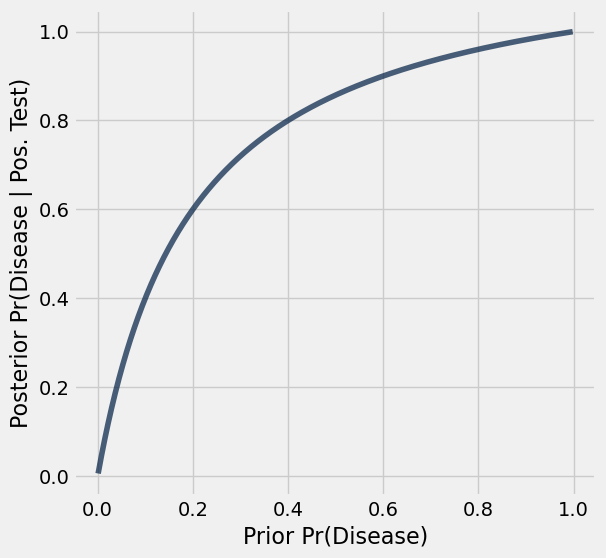

In [11]:
pr_disease = np.arange(1,999)/1000
# (1/1000, 2/1000, .... 998/1000)
pr_pos_given_disease = 0.90 # P( Positive | Disease), True  Positive
# or 1% false negative, you test negative but you DO have the disease
pr_pos_given_no_disease = 0.15 # P(Positive | No Disease), False Positive

post = bayes_rule(pr_disease, pr_pos_given_disease, pr_pos_given_no_disease)
Table().with_columns(
    "Prior Pr(Disease)", pr_disease, 
    "Posterior Pr(Disease | Pos. Test)", post).plot("Prior Pr(Disease)")

#x-axis is the prevalence of disease
# 0 being rare, 1 being common (common cold)
# y-axis is probabiliyt of us having the disease given we test positive

# remember the rare disease, P(Disease | Positive) ~ 2% even though the test is deemed pretty accurate
# as the disease becomes more prevalent, this probaiblity increases

# P(Disease|Positive) tells us less here of the overall accuracy of the test (assuming we are testing anybody/everybody, not just those
# the disease) and we are assuming the test is accurate enough

# what it tells us is more tied with how common or not the disease
# it is more tied with the prevalence of the disease